In [2]:
import cv2

participant_number = '3'
video_path = f"./data/Videos/P{participant_number}.avi"


cap = cv2.VideoCapture(video_path)

In [3]:
from frame import Frame


frames = []
cap = cv2.VideoCapture(video_path)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(Frame(len(frames), participant_number, frame))
cap.release()

### Cascade classifiers

- The “cascade” in cascade classifiers refers to the process where the input image is passed through a series of stages or filters. Each stage uses a weak classifier to determine if the object of interest (e.g., a face or a smile) is present. If the image passes through a stage, it proceeds to the next stage. If it fails a stage, the image is rejected.

- Haar Features: The classifier uses Haar-like features to detect objects. They are a set of simple rectangular features used in computer vision, particularly for object detection, such as face detection.

### Grayscale

- Converting an image to grayscale is a common preprocessing step in computer vision tasks. Reasons:

    1. Simplification: Grayscale has only one channel compared to the three channels (RGB). This makesprocessing faster and more efficient.

    2. Feature Extraction:computer vision algorithms work better on grayscale images because they rely on intensity changes rather than color changes.

    3. Noise Reduction

### TODO: 
1. Add code to identify the interviewee's face and compare it with each frame to eliminate other faces
2. The classifier doesn't work properly with Asians (like P6)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


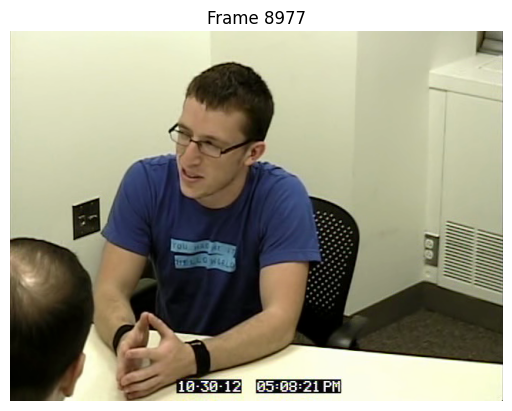

index=8977, smile_area=0.0, participant=3


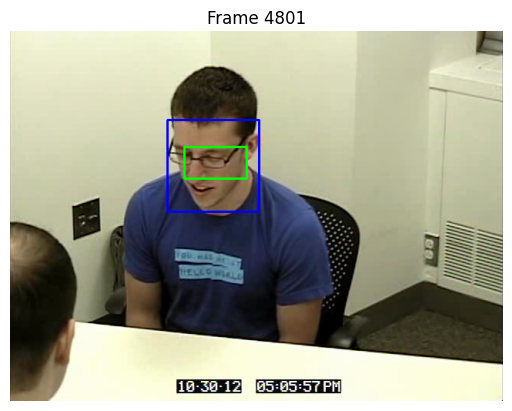

index=4801, smile_area=100.0, participant=3


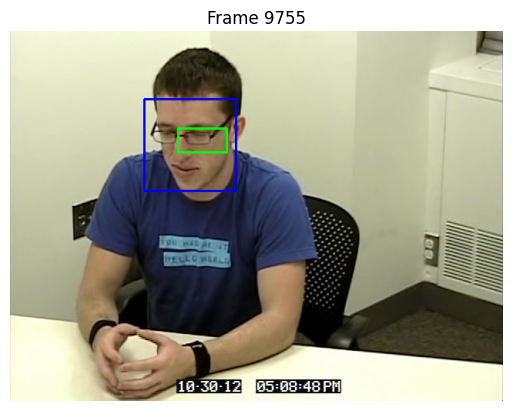

index=9755, smile_area=59.0, participant=3


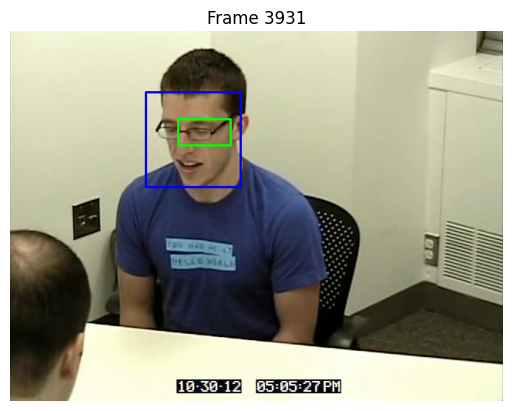

index=3931, smile_area=70.0, participant=3


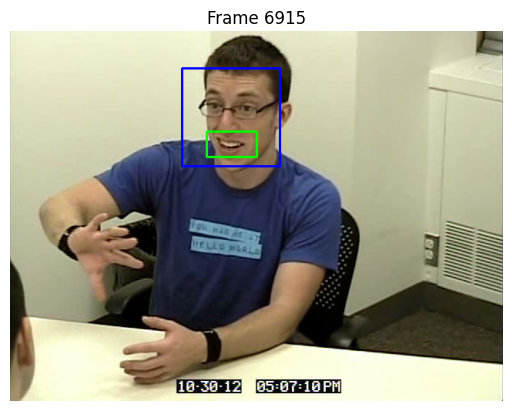

index=6915, smile_area=65.0, participant=3


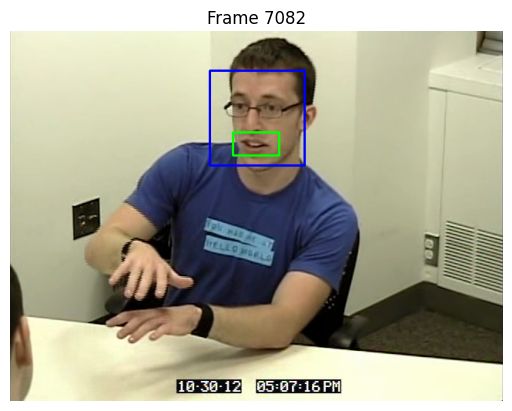

index=7082, smile_area=54.0, participant=3


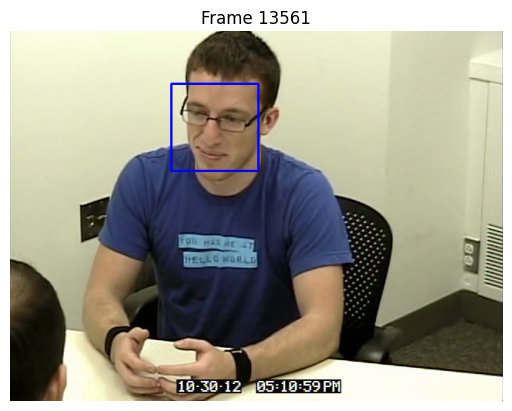

index=13561, smile_area=0.0, participant=3


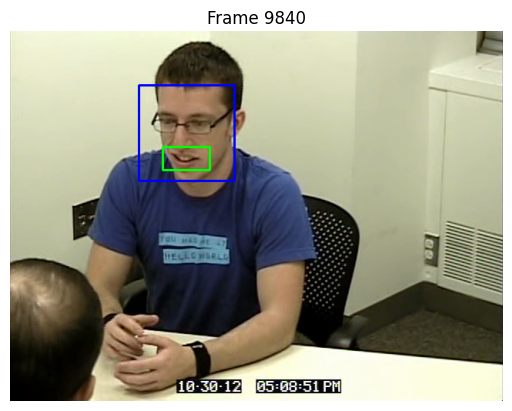

index=9840, smile_area=55.0, participant=3


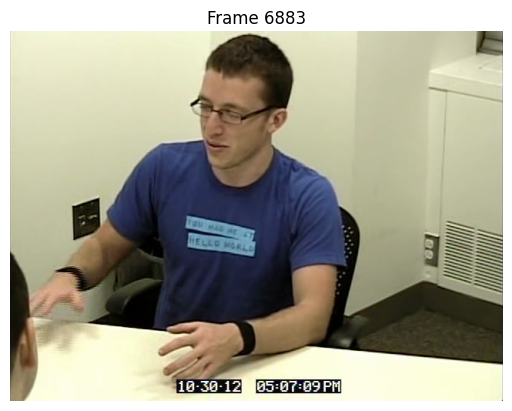

index=6883, smile_area=0.0, participant=3


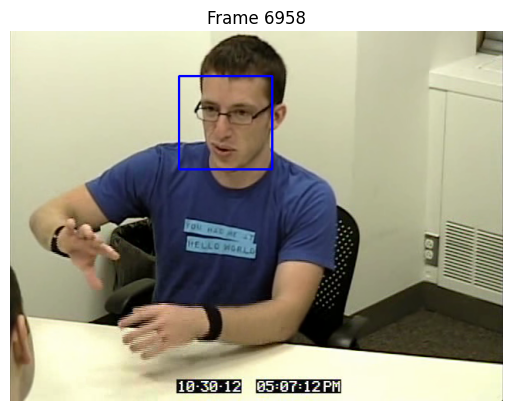

index=6958, smile_area=0.0, participant=3


In [25]:
%load_ext autoreload
%autoreload 2
from smile_detector import SmileDetector
import random

smile_detector = SmileDetector()
frame_selection = random.sample(frames, 10)
for frame in frame_selection:
    frame.face = smile_detector.get_face(frame.image)
    frame.smile = smile_detector.get_smile(frame.image, frame.face) if frame.face is not None else None
    frame.smile_area = smile_detector.get_smile_area(frame.smile) if frame.smile is not None else 0
            
smile_areas = [frame.smile_area for frame in frame_selection]
min_smile_area = min(smile_areas)
max_smile_area = max(smile_areas)
for frame in frame_selection:
    frame.draw_face()
    frame.draw_smile()
    frame.smile_area = smile_detector.normalize_smile_area(min_smile_area, max_smile_area, frame.smile_area).round()
    frame.display()
    print(str(frame))

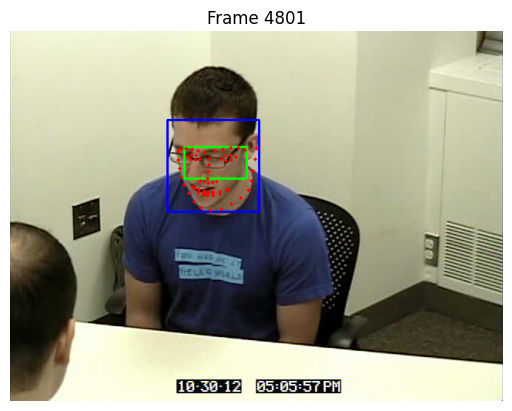

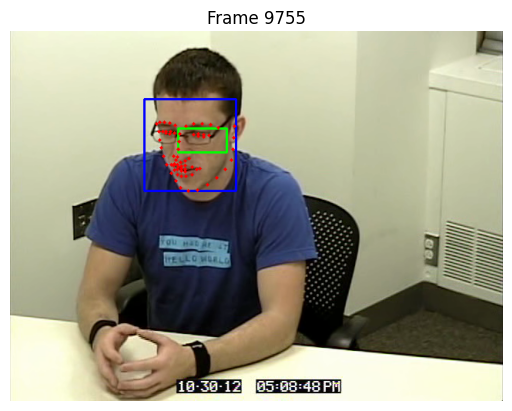

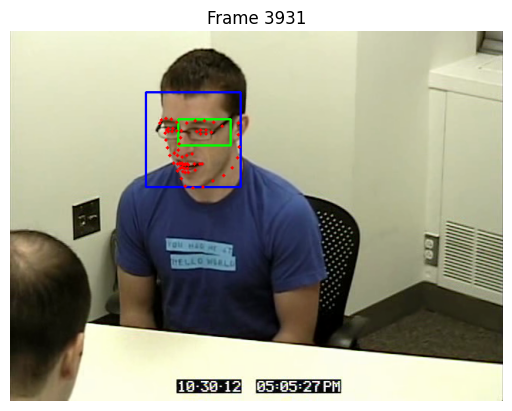

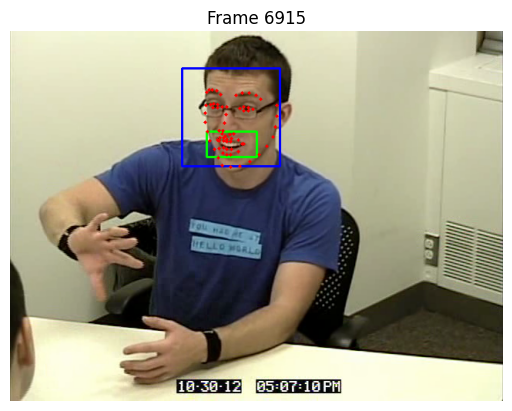

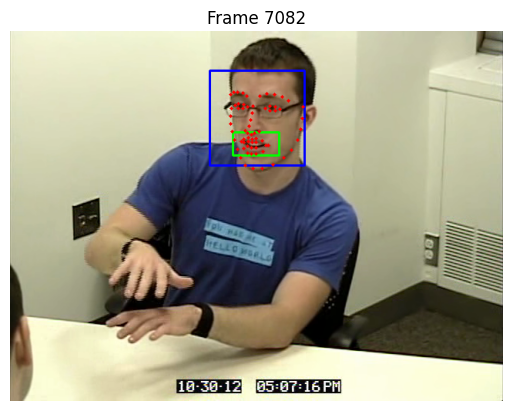

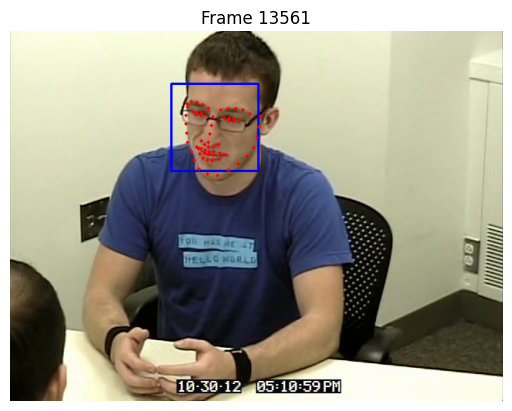

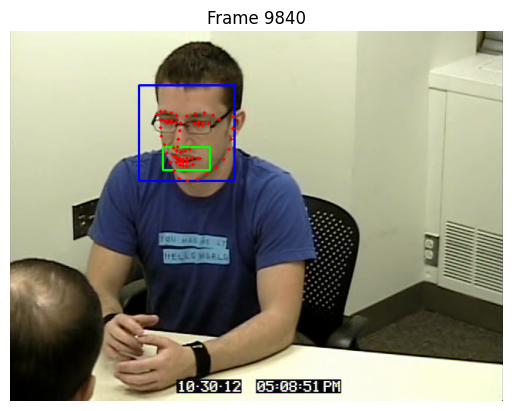

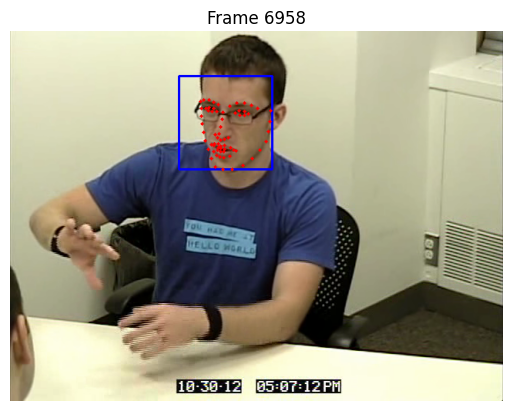

In [26]:
import dlib
import cv2
from imutils import face_utils

predictor = dlib.shape_predictor("models/shape_predictor_68_face_landmarks.dat")

# Assuming you already have the face cascade and frames
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

for frame in frame_selection:
    frame_image = frame.image  
    if frame.face is None:
        continue
    else:
        (x, y, w, h) = frame.face
    
    
    # Convert (x, y, w, h) to a dlib.rectangle
    dlib_rect = dlib.rectangle(int(x), int(y), int(x + w), int(y + h))

    # Get facial landmarks
    landmarks = predictor(smile_detector.convert_to_gray(frame.image), dlib_rect)

    # Convert the landmarks to a NumPy array
    landmarks_np = face_utils.shape_to_np(landmarks)

    # Draw landmarks on the frame
    for (lx, ly) in landmarks_np:
        cv2.circle(frame_image, (lx, ly), 2, (0, 255, 0), -1)  # Green dots

    frame.display()

# Clean up
cv2.destroyAllWindows()